### Pandas  기초

### 가상환경 설치

#### Virtualenv 모듈 설치
```
!pip install virtualenv
```

In [192]:
!pip install virtualenv


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 가상환경 설정
```
virtualenv da_env
```

- 주피터 노트북 커널을 da_env(Python 3.11.2)로 변경
- ipykernel 설치 (아나콘다, VSCode에서 주피터 노트북 사용시 필수)

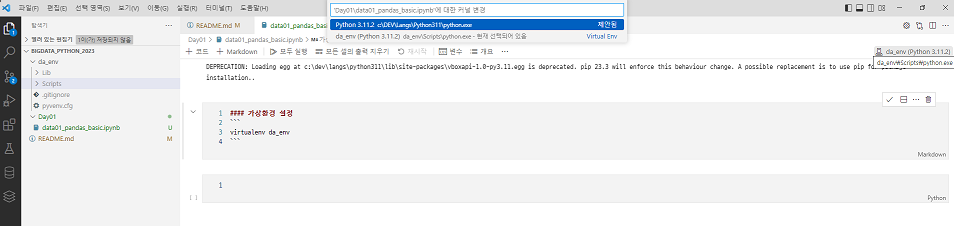

##### 가상환경 패키지(pip) 확인

In [193]:
!pip list

Package           Version
----------------- -------
asttokens         2.2.1
backcall          0.2.0
colorama          0.4.6
comm              0.1.4
debugpy           1.6.7
decorator         5.1.1
distlib           0.3.7
executing         1.2.0
filelock          3.12.2
ipykernel         6.25.1
ipython           8.14.0
jedi              0.19.0
jupyter_client    8.3.0
jupyter_core      5.3.1
matplotlib-inline 0.1.6
nest-asyncio      1.5.7
numpy             1.25.2
packaging         23.1
pandas            2.0.3
parso             0.8.3
pickleshare       0.7.5
pip               23.0
platformdirs      3.10.0
prompt-toolkit    3.0.39
psutil            5.9.5
pure-eval         0.2.2
Pygments          2.16.1
python-dateutil   2.8.2
pytz              2023.3
pywin32           306
pyzmq             25.1.0
setuptools        67.1.0
six               1.16.0
stack-data        0.6.2
tornado           6.3.2
traitlets         5.9.0
tzdata            2023.3
virtualenv        20.24.2
wcwidth           0.2.6
w


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### 판다스 설치 
```
!pip install pandas
```

In [194]:
!pip install pandas


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
!pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote

In [196]:
!pip show numpy

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: C:\Source\BigData_Python_2023\da_env\Lib\site-packages
Requires: 
Required-by: pandas


#### Pandas 기초

##### 개요

엑셀과 유사한 테이블 형태로 데이터를 핸들링할 수 있는 파이썬 모듈

데이터 분석을 위한 추상 자료구조(DataFrame!!)를 제공하는 데이터 분석도구

###### 기본기능
- 엑셀/CSV/Json 등 데이터파일에서 데이터 읽어오기
- 데이터 처리/분석
- 엑셀/CSV/Json 등 데이터파일에 저장

######  Pandas 용어
- Series, DataFrame
- Index, Columns, Values, etc

#### Pandas 학습 시작

##### 시리즈
판다스에서 1차원 배열과 똑같은 자료형(데이터 타입)

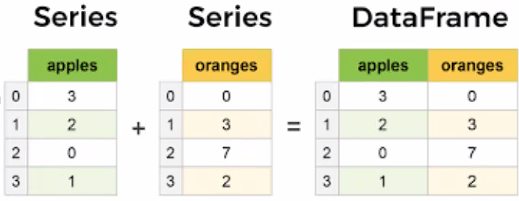

##### 판다스 모듈 import
```python
import pandas as pd
```

In [197]:
import pandas as pd

##### 시리즈 생성

In [198]:
grade = pd.Series(data=['홍길동',90,50,75,100], index=['이름','국어','영어','수학','미술'],name='기말고사 점수')
grade

이름    홍길동
국어     90
영어     50
수학     75
미술    100
Name: 기말고사 점수, dtype: object

In [199]:
grade.values

array(['홍길동', 90, 50, 75, 100], dtype=object)

In [200]:
grade.index

Index(['이름', '국어', '영어', '수학', '미술'], dtype='object')

In [201]:
grade.name

'기말고사 점수'

##### 판다스 시리즈 타입으로 전환

- 리스트 -> pd.Series(data=[])
- 딕셔너리 { 'key' : 'value' } -> pd.Series(data={})

In [202]:
sujin_data = { '이름' : '이수진', '국어' : 100, '영어' : 100, '수학' : 100, '미술' : 40}
type(sujin_data)

dict

In [203]:
# 리스트보다 딕셔너리로 데이터를 사용하는 것이 판다스 시리즈 생성할 때 편리함
grade2 = pd.Series(data=sujin_data)
grade2

이름    이수진
국어    100
영어    100
수학    100
미술     40
dtype: object

In [204]:
type(grade)
type(grade2)

pandas.core.series.Series

# 중요 !

None(==Null),NaN ->  결측치라고 부르고 결측치가 있으면 데이터 분석이 부정확

In [205]:
# (빅)데이터 분석에서 가장 조심해야할 것, None(결측치)
grade3 = pd.Series(data=['규수', None, 10, 0, None], index=['이름','국어','수학','영어',''])
grade3

이름      규수
국어    None
수학      10
영어       0
      None
dtype: object

##### 재색인

결측치가 있거나 인덱스가 잘못되었을 때 다시 정립하는 작업

In [206]:
grade4 = grade3.reindex(index=['이름','국어','영어','수학'])
grade4

이름      규수
국어    None
영어       0
수학      10
dtype: object

##### 결측치 없애기
- reindex() 매서드 fill_value 속성
- 만들어진 시리즈 fillna(0) - None,NaN 동시에 처리 됨

##### inplace !!!
- 지금 내가 처리하는 기능으로 값을 완전 대체해줌(commit 동일)

In [207]:
# 결측치 없애기
grade5 = grade3.reindex(index=['이름','국어','영어','수학','미술'])
grade5

이름      규수
국어    None
영어       0
수학      10
미술     NaN
dtype: object

In [208]:
grade5.fillna(0)

이름    규수
국어     0
영어     0
수학    10
미술     0
dtype: object

In [209]:
grade5

이름      규수
국어    None
영어       0
수학      10
미술     NaN
dtype: object

In [210]:
grade5.fillna(0,inplace=True)
grade5

이름    규수
국어     0
영어     0
수학    10
미술     0
dtype: object

##### 이름 변경

인덱스의 이름을 변경해주는 기능

In [211]:
grade3

이름      규수
국어    None
수학      10
영어       0
      None
dtype: object

In [212]:
grade3.rename({'이름':'Name','국어':'Korean','수학':'Math','영어':'English','':'Art'}, inplace=True)
print(grade3)

Name         규수
Korean     None
Math         10
English       0
Art        None
dtype: object


##### 판다스 시리즈 요소 제어

파이썬 리스트(배열) 요소 접근방법과 유사

In [213]:
print(grade)
print(grade[0])
print(grade['이름'])

이름    홍길동
국어     90
영어     50
수학     75
미술    100
Name: 기말고사 점수, dtype: object
홍길동
홍길동


In [214]:
print(grade[2])
print(grade['영어'])

50
50


In [215]:
# 로케이션 속성 : 현재 지정된 인덱스 명으로 찾음, 인덱스 숫자로는 찾을 수 없음
grade.loc['영어']       # location

50

##### 시리즈에서 인덱스 변경

변경된 데이터만 임시 출력

In [216]:
grade[['이름','미술']]

이름    홍길동
미술    100
Name: 기말고사 점수, dtype: object

In [217]:
print(grade.reindex(index=['이름','미술']))
print(grade)

이름    홍길동
미술    100
Name: 기말고사 점수, dtype: object
이름    홍길동
국어     90
영어     50
수학     75
미술    100
Name: 기말고사 점수, dtype: object


##### 결측치 찾아내는 함수

In [218]:
grade.isnull()

이름    False
국어    False
영어    False
수학    False
미술    False
Name: 기말고사 점수, dtype: bool

In [219]:
grade2.isnull()

이름    False
국어    False
영어    False
수학    False
미술    False
dtype: bool

In [220]:
print(grade3)
grade3.isnull()

Name         규수
Korean     None
Math         10
English       0
Art        None
dtype: object


Name       False
Korean      True
Math       False
English    False
Art         True
dtype: bool

In [221]:
grade3.notnull()

Name        True
Korean     False
Math        True
English     True
Art        False
dtype: bool

In [222]:
import numpy as np
grade3['Korean'] = 40
print(grade3)
grade3['Art'] = np.NaN
grade3

Name         규수
Korean       40
Math         10
English       0
Art        None
dtype: object


Name        규수
Korean      40
Math        10
English      0
Art        NaN
dtype: object

In [223]:
# 필요한 인덱스 값만 변경가능
grade3[['Korean','Art']] = (30, 90)
grade3

Name       규수
Korean     30
Math       10
English     0
Art        90
dtype: object

##### 시리즈 삭제

In [224]:
grade7 = grade3
grade7

Name       규수
Korean     30
Math       10
English     0
Art        90
dtype: object

In [225]:
del grade7['Math']

In [226]:
# inplace True로 하면 완전히 대체되서 지워짐
grade7.drop('English',inplace=True)
grade7

Name      규수
Korean    30
Art       90
dtype: object

In [227]:
del grade7
grade7

NameError: name 'grade7' is not defined